In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
device_info = pd.read_csv('device_info.csv')
email_info = pd.read_csv('email_info.csv')
employee_info = pd.read_csv('employee_info.csv')
http_info = pd.read_csv('http_info.csv')
logon_info = pd.read_csv('logon_info.csv')

In [3]:
employee_info.head()

,month,employee_name,user_id,email,role,supervisor
0,5/1/17,Macey Colleen Nash,MCN0973,Macey.Colleen.Nash@dtaa.com,ElectricalEngineer,Ann Hannah Dickerson
1,5/1/17,Nelle Sharon Cherry,NSC0622,Nelle.Sharon.Cherry@dtaa.com,Technician,Amethyst Suki Norris
2,5/1/17,Kathleen Audrey Vargas,KAV0428,Kathleen.Audrey.Vargas@dtaa.com,ProductionLineWorker,Brenna Martha Russell
3,5/1/17,Adrienne Joelle Mclean,AJM0772,Adrienne.Joelle.Mclean@dtaa.com,Scientist,Emmanuel Casey Wiggins
4,5/1/17,Nicole Maris Valentine,NMV0507,Nicole.Maris.Valentine@dtaa.com,Manager,Perry Reese Morton


In [4]:
# Filter Emails Sent Within the Company
fil_dtaa = email_info['to'].apply(lambda t: t.split('@')[1] != 'dtaa.com')
df_fil_dtaa = email_info[fil_dtaa]
# Filter Group Emails
fil_group = df_fil_dtaa['to'].apply(lambda t: ';' not in t)
df_fil_group = df_fil_dtaa[fil_group]
# Filter Non-Defense Contract Company Emails
email_to_rm = ['comcast.net','aol.com','gmail.com','yahoo.com','cox.net','hotmail.com','verizon.net',
               'juno.com','netzero.com','msn.com','charter.net','earthlink.net','sbcglobal.net','bellsouth.net',
               'optonline.net','hp.com']
fil_common_email = df_fil_group['to'].apply(lambda t: t.split('@')[1] not in email_to_rm)
df_fil_common_email = df_fil_group[fil_common_email]
# Filter All Emails with No Attachments
fil_no_attach = df_fil_common_email['attachments'].apply(lambda t: t != 0)
df_pure = df_fil_common_email[fil_no_attach]

In [5]:
# Suspect Company Emails
print(df_pure['to'].apply(lambda t: t.split('@')[1]).unique())

['raytheon.com' 'boeing.com' 'harris.com' 'northropgrumman.com'
 'lockheed.com']


In [6]:
# Create DataFrames With Only Raytheon, Boeing, Harris, Northropgrumman, and Lockheed Emails
df_ray = df_pure[df_pure['to'].apply(lambda t: t.split('@')[1] == 'raytheon.com')]
df_boeing = df_pure[df_pure['to'].apply(lambda t: t.split('@')[1] == 'boeing.com')]
df_harris = df_pure[df_pure['to'].apply(lambda t: t.split('@')[1] == 'harris.com')]
df_north = df_pure[df_pure['to'].apply(lambda t: t.split('@')[1] == 'northropgrumman.com')]
df_lock = df_pure[df_pure['to'].apply(lambda t: t.split('@')[1] == 'lockheed.com')]

In [7]:
df_ray_cnts = pd.DataFrame(columns=['email','counts_from'])
df_ray_cnts['email'] = list(df_ray.groupby('from').size().index)
df_ray_cnts['counts_from'] = list(df_ray.groupby('from').size())
df_ray_cnts.sort_values('counts_from',ascending=False).head(10)

,email,counts_from
54,Kelly.Hashim.Carr@dtaa.com,34
72,Neville.Stephen.Abbott@dtaa.com,14
12,Casey.Adena.Butler@dtaa.com,12
60,Lane.Jonathan.Bridges@dtaa.com,11
56,Kirsten.Faith.Drake@dtaa.com,11
58,Kyra.Fiona.Bonner@dtaa.com,10
32,Giacomo.Russell.Moreno@dtaa.com,9
26,Francesca.Aimee.Mendoza@dtaa.com,9
85,Rose.Nadine.Ayers@dtaa.com,8
96,Zoe.Jena.Williams@dtaa.com,7


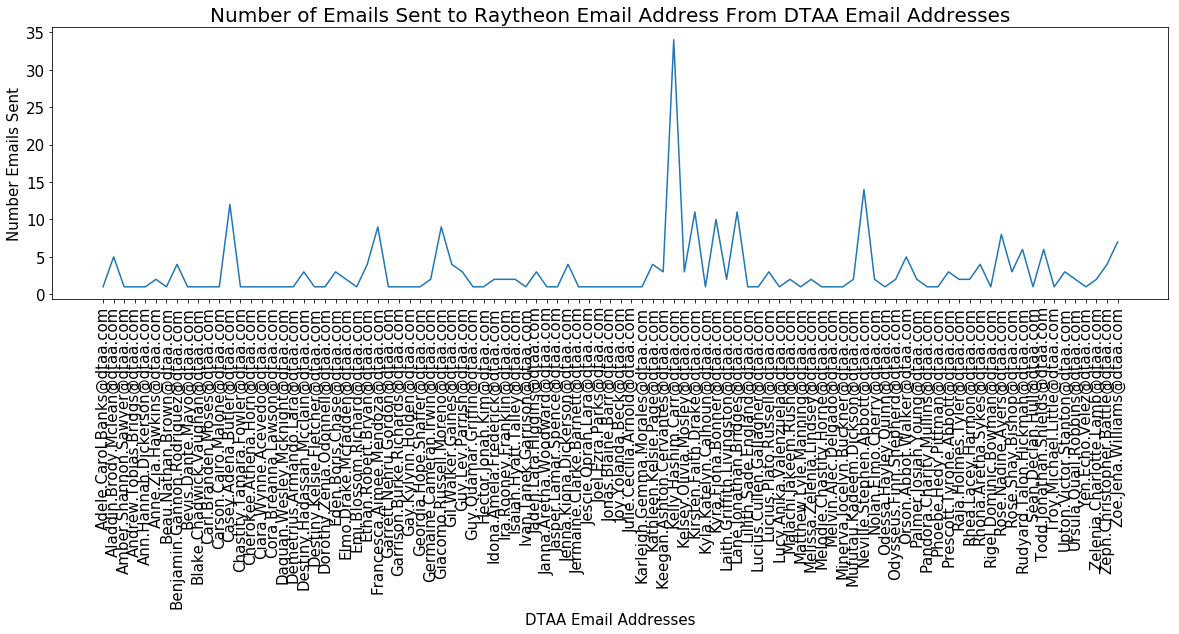

In [20]:
x_ray = list(df_ray_cnts.email.unique())
y_ray = list(df_ray_cnts.counts_from)
#plot_ray = plt.figure(figsize=(20,5))
ax = plt.subplots(1,1,figsize=(20,5))
plt.plot(x_ray,y_ray)
plt.xticks(rotation=90,size=15)
plt.yticks(size=15)
plt.xticks(range(len(list(df_ray_cnts.email))), list(df_ray_cnts.email))
plt.title('Number of Emails Sent to Raytheon Email Address From DTAA Email Addresses',size=20)
plt.xlabel('DTAA Email Addresses',size=15)
plt.ylabel('Number Emails Sent',size=15)
plt.show()

In [9]:
df_boeing_cnts = pd.DataFrame(columns=['email','counts_from'])
df_boeing_cnts['email'] = list(df_boeing.groupby('from').size().index)
df_boeing_cnts['counts_from'] = list(df_boeing.groupby('from').size())
df_boeing_cnts.sort_values('counts_from',ascending=False).head(10)

,email,counts_from
126,Vladimir.Dale.Tyson@dtaa.com,16
123,Vaughan.Emery.Paul@dtaa.com,13
39,Elmo.Drake.Mcfadden@dtaa.com,13
92,Olivia.Lacy.Mcpherson@dtaa.com,12
55,Ingrid.Alma.Fields@dtaa.com,11
22,Cole.Basil.Nunez@dtaa.com,11
1,Ali.Cullen.Perry@dtaa.com,11
43,Francesca.Kylie.Russo@dtaa.com,10
70,Kevyn.Frances.Brennan@dtaa.com,8
38,Eden.Bernard.Strickland@dtaa.com,7


In [10]:
df_harris_cnts = pd.DataFrame(columns=['email','counts_from'])
df_harris_cnts['email'] = list(df_harris.groupby('from').size().index)
df_harris_cnts['counts_from'] = list(df_harris.groupby('from').size())
df_harris_cnts.sort_values('counts_from',ascending=False).head(10)

,email,counts_from
72,Moses.Todd.Perez@dtaa.com,22
37,Hadassah.Alma.Prince@dtaa.com,12
17,Chadwick.Valentine.Roy@dtaa.com,11
2,Anastasia.Tashya.Trevino@dtaa.com,10
64,Lucius.Ulysses.Phelps@dtaa.com,7
45,Jaden.Lara.Higgins@dtaa.com,6
48,Jescie.Oprah.Lara@dtaa.com,6
70,Mohammad.Armando.Vega@dtaa.com,6
28,Evelyn.Xena.Santana@dtaa.com,5
59,Kitra.MacKensie.Dillon@dtaa.com,5


In [11]:
df_north_cnts = pd.DataFrame(columns=['email','counts_from'])
df_north_cnts['email'] = list(df_north.groupby('from').size().index)
df_north_cnts['counts_from'] = list(df_north.groupby('from').size())
df_north_cnts.sort_values('counts_from',ascending=False).head(10)

,email,counts_from
86,Rhona.Aretha.Sykes@dtaa.com,23
55,Kaitlin.Amity.Armstrong@dtaa.com,20
97,Yeo.Xyla.Garner@dtaa.com,20
80,Paula.Delilah.Barnett@dtaa.com,19
38,Hammett.Keegan.Powell@dtaa.com,15
8,Austin.Stewart.Mccarthy@dtaa.com,11
46,Jaden.Lara.Higgins@dtaa.com,9
47,Jakeem.Leonard.Clark@dtaa.com,8
92,Sawyer.Patrick.Horne@dtaa.com,7
88,Rose.Nadine.Ayers@dtaa.com,6


In [14]:
df_lock

,id,date,to,from,size,attachments
232242,{W5P6-C8PU34MC-9435YFUX},08/24/2017 09:28:37,Mario.Truman.Telsa@lockheed.com,Cedric.Cyrus.Harrison@dtaa.com,36158,1
245090,{D0D1-E2BU14RD-2454QLSS},08/30/2017 14:41:22,Mario.Truman.Telsa@lockheed.com,Cedric.Cyrus.Harrison@dtaa.com,19472,1
